In [2]:
import numpy as np
import pandas as pd
import nltk
import os
from nltk.util import bigrams
from nlp_exploration.visual_text_connection import gensim_topic_model, graph_word_connection

#### Data Source
#### https://www.kaggle.com/sanglequang/van-hoc-viet-nam

In [3]:
DIR = "vietnamese_data/con-hoang_HBC/"
valid_file = ['.txt']
doc_sum = []
for text in os.listdir(DIR):
    ext = os.path.splitext(text)[1]
    if ext.lower() in valid_file:
        text_ = open(os.path.join(DIR,text)).read()
        doc_sum.append(text_)

In [4]:
doc_sum[0][0:32]

'phụ nữ là hoa hồng của nhân loại'

In [5]:
# ### Tokenize words 
#split words in each list
base_tokens = [i.split() for i in doc_sum]
#make list of list to become list
list_tokens = [item for sublist in base_tokens for item in sublist]


In [6]:
list_tokens[0:10]

['phụ', 'nữ', 'là', 'hoa', 'hồng', 'của', 'nhân', 'loại', 'chiến', 'tranh']

#### Code frequency
#### https://www.nltk.org/howto.html

In [7]:
#### Word Frequency
freq_uni_base_corpus = nltk.FreqDist(list_tokens)
print(freq_uni_base_corpus.most_common(20))

[('ông', 701), ('mẹ', 657), ('như', 586), ('không', 572), ('con', 552), ('anh', 486), ('người', 470), ('những', 452), ('em', 426), ('tôi', 423), ('một', 422), ('là', 418), ('có', 400), ('bà', 388), ('của', 382), ('trong', 327), ('được', 281), ('lại', 278), ('làm', 274), ('vào', 267)]


In [8]:
#### Calculate the probability of the word appear in the corpus
smoothed_dist_uni_base = nltk.LaplaceProbDist(freq_uni_base_corpus)

In [9]:
# what is the probability of fried chicken?
smoothed_dist_uni_base.logprob('gà rán')

-15.723554295358676

In [10]:
# what is the probability of a popular pronoun `anh`?
smoothed_dist_uni_base.logprob('anh')

-6.7957763332763355

In [12]:
### Bi-gram Word Frequency
base_bigrams = nltk.bigrams(list_tokens)
freq_bi_base_corpus = nltk.FreqDist(base_bigrams)
print(freq_bi_base_corpus.most_common(5))

[(('mẹ', 'tôi'), 93), (('người', 'ta'), 64), (('ông', 'hạnh'), 59), (('đàn', 'bà'), 58), (('đàn', 'ông'), 58)]


#### Topic Modelling using Gensim  
#### https://radimrehurek.com/gensim/install.html

In [17]:
ldamodel = gensim_topic_model(list_tokens)

In [18]:
# Show topic
topics = ldamodel.show_topics(num_topics=3, num_words=10, formatted=False)
topics[0][1] # word and the possibility 

[('không', 0.064479046),
 ('bà', 0.058283437),
 ('con', 0.05346054),
 ('là', 0.04659263),
 ('những', 0.03720853),
 ('làm', 0.02960865),
 ('và', 0.02458008),
 ('lên', 0.01923497),
 ('cũng', 0.018032866),
 ('thế', 0.017318366)]

#### Using pke and networkx to visualize data connection

In [ ]:
#### https://boudinfl.github.io/pke/build/html/unsupervised.html
#### https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html
#### @InProceedings{boudin:2016:COLINGDEMO,
####  author    = {Boudin, Florian},
####  title     = {pke: an open source python-based keyphrase extraction toolkit},
####  booktitle = {Proceedings of COLING 2016, the 26th International Conference on Computational ####Linguistics: System Demonstrations},
####  month     = {December},
####  year      = {2016},
####  address   = {Osaka, Japan},
####  pages     = {69--73},
####  url       = {http://aclweb.org/anthology/C16-2015}
#### }

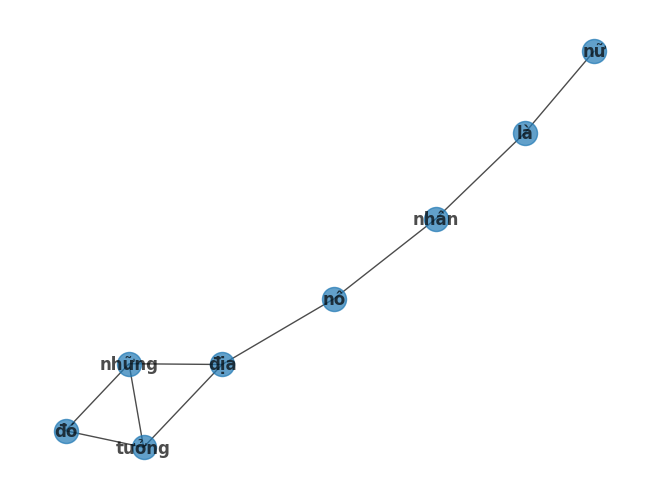

In [25]:
graph_ = graph_word_connection(doc_sum[0][0:100])

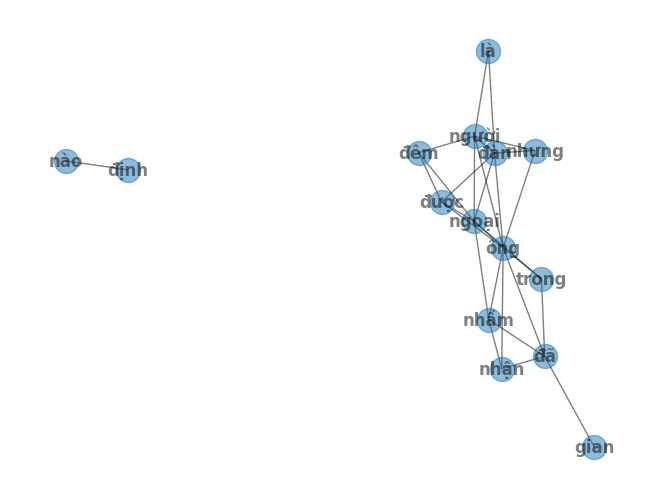

In [38]:
graph_ = graph_word_connection(doc_sum[1])